In [39]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [40]:
data = pandas.read_csv('../Lab/Data/car.csv')
data

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [41]:
data.shape

(205, 26)

In [42]:
data.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [43]:
data.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


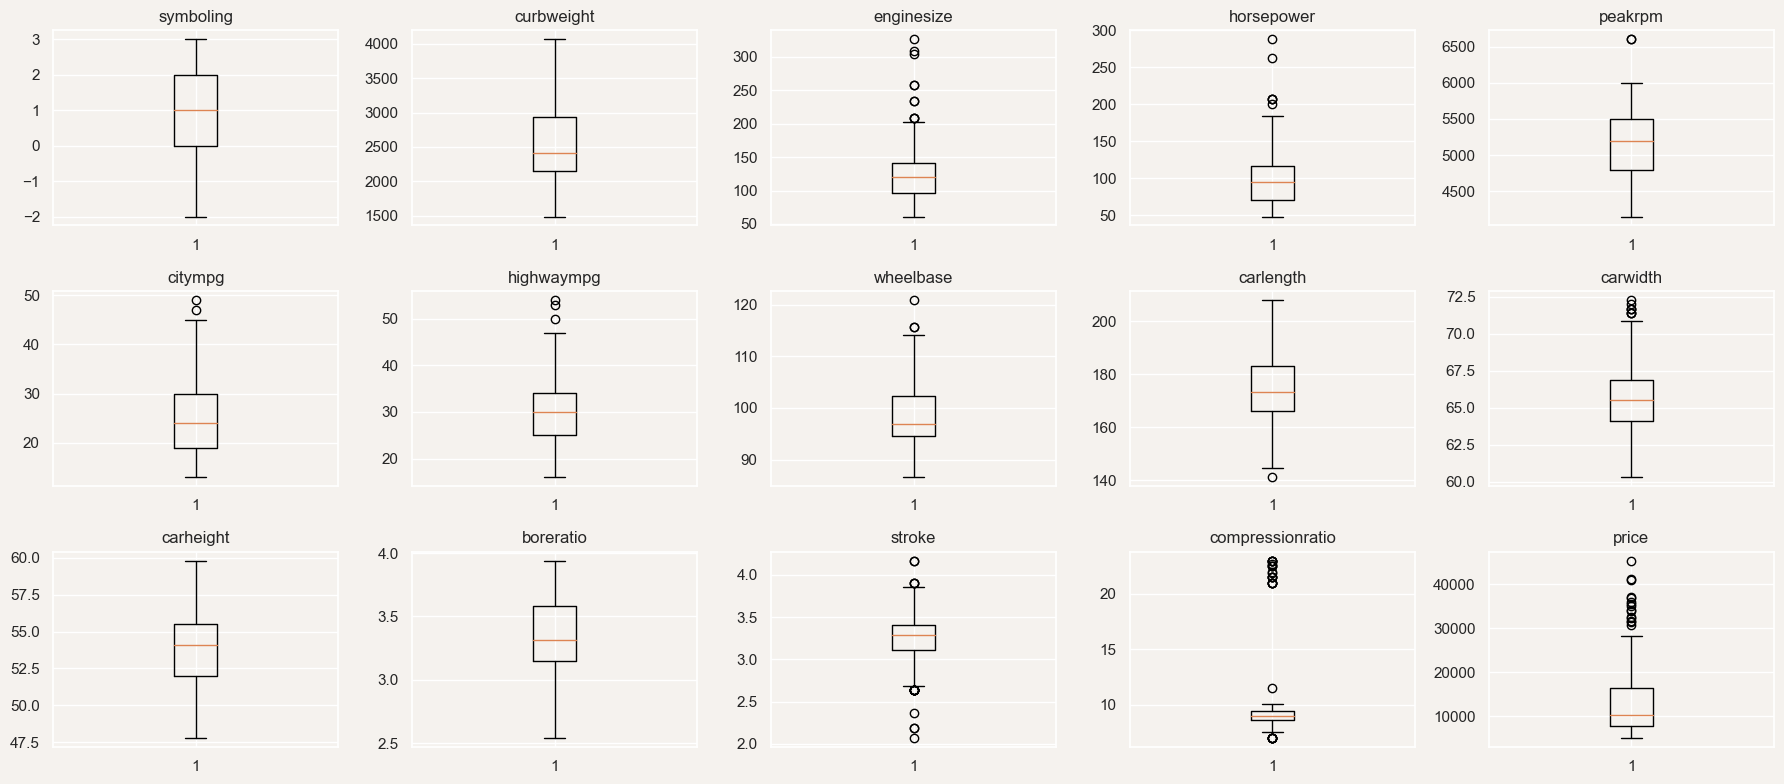

In [55]:
sns.set(rc={'axes.facecolor':'#f5f2ee', 'figure.facecolor':'#f5f2ee'})

col=['symboling', 'curbweight', 'enginesize', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio',
       'stroke', 'compressionratio', 'price']

plt.figure(figsize=(18,8))
n=np.arange(0,17,1)

for i,k in zip(col,n):
    plt.subplot(3,5,k+1)
    plt.boxplot(data[i])
    plt.title(col[k])
    plt.tight_layout()

In [45]:
X = data[col].drop('price', axis=1)
y = data['price']


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [47]:
print('Số giá trị trong từng bộ dữ liệu')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

Số giá trị trong từng bộ dữ liệu
X_train:  (164, 14)
y_train:  (164,)
X_test:  (41, 14)
y_test:  (41,)


In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
model.score(X_test, y_test)

0.7836891064412904

In [50]:
predicts = model.predict(X_test)
predicts[:5]

array([7886.49941917, 5541.60041872, 6991.61362908, 5740.73496861,
       7159.18425283])

In [51]:
price_test = pandas.DataFrame(y_test)
price_test.reset_index(drop=True, inplace=True)
price_predicted = pandas.DataFrame(predicts.round(2), columns=['Predicted Price'])
price_comparing = pandas.concat([price_test, price_predicted], axis=1)

In [52]:
price_comparing

,price,Predicted Price
0,6669.0,7886.50
1,7999.0,5541.60
2,6338.0,6991.61
3,8916.5,5740.73
4,10295.0,7159.18
5,25552.0,25081.94
6,8249.0,7075.72
7,5151.0,-921.62
8,6488.0,6969.41
9,10245.0,10413.96
